# Student Name: Lucy Tan

# Preface

In the example below, we have two classes, Environment and Agent. The Environment has 4 possible actions in all states (there are no states actually in this case but states can be easily added to the class) and regardless of the Agent's action the Environment generates a reward from normal distribution with mean 6 and variance 1. The Agent can choose one of the actions available to it and picks them at random. Then we run the experiment for 100 time steps by calling rewards_hist(100) and observe historical rewards.    

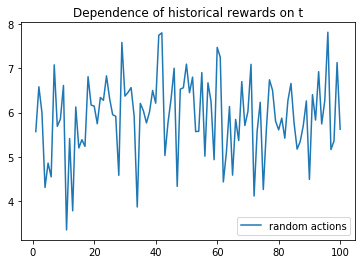

In [5]:
import random
from matplotlib import pyplot as plt 
import numpy as np

class Environment:
    def __init__(self):
        self.time = 1

    def admissible_actions(self):
        return list(range(1,5))

    def get_reward(self, action):
        self.time += 1
        return random.gauss(6,1)


class Agent:
    def __init__(self):
        self.current_reward = 0.0

    def step(self, env):
        actions = env.admissible_actions()
        reward = env.get_reward(random.choice(actions))
        self.current_reward = reward
        
        
def rewards_hist(T = 10):
    env = Environment()
    agent = Agent()
    rewards = []
    while env.time <= T:
        agent.step(env)
        rewards.append(agent.current_reward)
    return np.asarray(rewards)


from matplotlib import pyplot as plt 
import numpy as np   
T = 100
plt.plot(range(1,T+1),rewards_hist(T),label='random actions')
plt.title('Dependence of historical rewards on t')
plt.legend()
plt.show()

## Problem 1 (5 points)

Please modify the Environment so that it generates rewards with mean 4, 6, 8, and 10 for actions 1, 2, 3, and 4, respectively. Please keep unit variance in all cases. Plot your historical rewards for 1, 2,..., T, where T = 100.

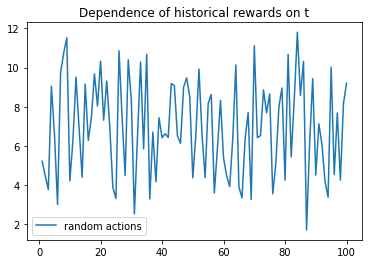

In [9]:
import random
from matplotlib import pyplot as plt 
import numpy as np

class Environment:
    def __init__(self):
        self.time = 1

    def admissible_actions(self):
        return list(range(1,5))

    def get_reward(self, action):
        self.time += 1
        reward = self.action_reward_lookup(action)
        return reward
    
    def action_reward_lookup(self, action):
        action_reward_dict = {
            1:random.gauss(4,1),
            2:random.gauss(6,1),
            3:random.gauss(8,1),
            4:random.gauss(10,1)
        }
        return action_reward_dict.get(action, random.gauss(6,1))


class Agent:
    def __init__(self):
        self.current_reward = 0.0

    def step(self, env):
        actions = env.admissible_actions()
        reward = env.get_reward(random.choice(actions))
        self.current_reward = reward
        
        
def rewards_hist(T = 10):
    env = Environment()
    agent = Agent()
    rewards = []
    while env.time <= T:
        agent.step(env)
        rewards.append(agent.current_reward)
    return np.asarray(rewards)


from matplotlib import pyplot as plt 
import numpy as np   
T = 100
plt.plot(range(1,T+1),rewards_hist(T),label='random actions')
plt.title('Dependence of historical rewards on t')
plt.legend()
plt.show()

## Problem 2 (15 points)

Modify the Agent so that it follows the $\varepsilon$-greedy selection method with $\varepsilon$ = 0.10 and the action value estimated by (2.3) of "Reinforcement Learning" by Sutton and Barto. Using this method and the Environment from Problem 1, plot observed historical rewards for 1, 2,..., T, where T = 100.

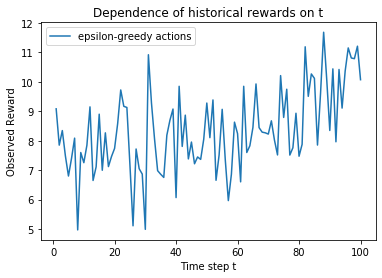

In [79]:
import random
from matplotlib import pyplot as plt 
import numpy as np
import collections

class Environment:
    def __init__(self):
        self.time = 1

    def admissible_actions(self):
        return list(range(1,5))

    def get_reward(self, action):
        self.time += 1
        reward = self.action_reward_lookup(action)
        return reward
    
    def action_reward_lookup(self, action):
        action_reward_dict = {
            1:random.gauss(4,1),
            2:random.gauss(6,1),
            3:random.gauss(8,1),
            4:random.gauss(10,1)
        }
        return action_reward_dict.get(action, random.gauss(6,1))


class Agent:
    def __init__(self, num_arms):
        self.current_reward = 0.0
        self.est_value = np.zeros(num_arms)
        self.n_action = np.zeros(num_arms)

    def step(self, env, epsilon):
        actions = env.admissible_actions()
        chosen_action = self.choose_action(env, actions, epsilon)
        reward = env.get_reward(chosen_action)
        self.n_action[chosen_action-1] = self.n_action[chosen_action-1] + 1
        self.est_value[chosen_action-1] = self.est_value[chosen_action-1] + (1/self.n_action[chosen_action-1])*(reward-self.est_value[chosen_action-1])
        self.current_reward = reward
    
    def choose_action(self, env, actions, epsilon):
        rand_num = random.uniform(0,1)
        if rand_num <= 1-epsilon:
            # Reference: https://stackoverflow.com/questions/42071597/numpy-argmax-random-tie-breaking
            chosen = np.random.choice(np.flatnonzero(self.est_value == self.est_value.max())) + 1
        else:
            chosen = random.choice(actions)
        return chosen
            
        
def rewards_hist(T = 10, epsilon = 0.0):
    env = Environment()
    agent = Agent(len(env.admissible_actions()))
    rewards = []
    while env.time <= T:
        agent.step(env, epsilon)
        rewards.append(agent.current_reward)
    return np.asarray(rewards)


from matplotlib import pyplot as plt 
import numpy as np   
T = 100
epsilon = 0.1
plt.plot(range(1,T+1),rewards_hist(T, epsilon),label='epsilon-greedy actions')
plt.title('Dependence of historical rewards on t')
plt.ylabel('Observed Reward')
plt.xlabel('Time step t')
plt.legend()
plt.show()

## Problem 3 (5 points)

Run the algorithm obtained in Problem 2 for 200 times (i.e. for 200 epochs) for T = 1000, and compute the observed average reward for each time t. Plot the average reward from those 200 epochs for 1, 2,..., T. Please notice that T = 1000 this time.

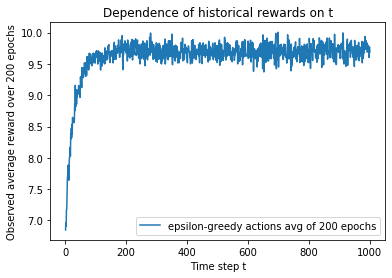

In [7]:
import random
from matplotlib import pyplot as plt 
import numpy as np
import collections

class Environment:
    def __init__(self):
        self.time = 1

    def admissible_actions(self):
        return list(range(1,5))

    def get_reward(self, action):
        self.time += 1
        reward = self.action_reward_lookup(action)
        return reward
    
    def action_reward_lookup(self, action):
        action_reward_dict = {
            1:random.gauss(4,1),
            2:random.gauss(6,1),
            3:random.gauss(8,1),
            4:random.gauss(10,1)
        }
        return action_reward_dict.get(action, random.gauss(6,1))


class Agent:
    def __init__(self, num_arms):
        self.current_reward = 0.0
        self.est_value = np.zeros(num_arms)
        self.n_action = np.zeros(num_arms)

    def step(self, env, epsilon):
        actions = env.admissible_actions()
        chosen_action = self.choose_action(env, actions, epsilon)
        reward = env.get_reward(chosen_action)
        self.n_action[chosen_action-1] = self.n_action[chosen_action-1] + 1
        self.est_value[chosen_action-1] = self.est_value[chosen_action-1] + (1/self.n_action[chosen_action-1])*(reward-self.est_value[chosen_action-1])
        self.current_reward = reward
    
    def choose_action(self, env, actions, epsilon):
        rand_num = random.uniform(0,1)
        if rand_num <= 1-epsilon:
            # Reference: https://stackoverflow.com/questions/42071597/numpy-argmax-random-tie-breaking
            chosen = np.random.choice(np.flatnonzero(self.est_value == self.est_value.max())) + 1
        else:
            chosen = random.choice(actions)
        return chosen
            
        
def rewards_hist(T = 10, epsilon = 0.0):
    env = Environment()
    agent = Agent(len(env.admissible_actions()))
    rewards = []
    while env.time <= T:
        agent.step(env, epsilon)
        rewards.append(agent.current_reward)
    return np.asarray(rewards)


from matplotlib import pyplot as plt 
import numpy as np
epochs = 200
T = 1000
epsilon = 0.1
all_rewards = []
for i in range(0, epochs):
    all_rewards.append(rewards_hist(T, epsilon))

all_rewards = np.asarray(all_rewards)
avg_rewards = (np.mean(all_rewards, axis=0))

plt.plot(range(1, T+1), avg_rewards, label='epsilon-greedy actions avg of 200 epochs')
plt.title('Dependence of historical rewards on t')
plt.ylabel('Observed average reward over 200 epochs')
plt.xlabel('Time step t')
plt.legend()
plt.show()